In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [18]:
term = "health"

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define a function to preprocess text
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text, "english")
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update({term.lower(), "htmlhtml", "pdfpdf", "bookb", "citationc"})
    words = [word for word in words if word not in stop_words]
    return words

[nltk_data] Downloading package stopwords to /home/suna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/suna/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
# Read the CSV file into a DataFrame
file_path = f'./{term}_google_scholar_results.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,title,authors,description,url,citations
0,[HTML][HTML] Health Care,National Academies of Sciences …,Promoting physical activity in health care set...,https://www.ncbi.nlm.nih.gov/books/NBK545645/,0
1,Integrating social care into the delivery of h...,", … Delivery of Health Care to Improve the Nat...",… ultimately aim to help improve health and he...,https://books.google.com/books?hl=en&lr=&id=JM...,0
2,[BOOK][B] The economics of health and health care,"S Folland, AC Goodman, M Stano, S Danagoulian",… new chapters: Disparities in Health and Heal...,https://www.taylorfrancis.com/books/mono/10.43...,0
3,An overview of GeoAI applications in health an...,"MN Kamel Boulos, G Peng, T VoPham",… Public health seeks to promote health and pr...,https://link.springer.com/article/10.1186/s129...,0
4,[BOOK][B] World mental health report: Transfor...,World Health Organization,… Mental health is a lot more than the absence...,https://books.google.com/books?hl=en&lr=&id=ln...,0


In [20]:
# Preprocess the text data
documents = df['title'].values

# Apply the preprocessing function to each document
documents = [preprocess_text(doc) for doc in documents]

# If preprocess_text returns a list of tokens, you might want to join them back into a single string
documents = [' '.join(doc) if isinstance(doc, list) else doc for doc in documents]

In [21]:
documents

['care',
 'integrating social care delivery care moving upstream improve nations',
 'economics care',
 'overview geoai applications healthcare',
 'world mental report transforming mental',
 'guidelines mental work',
 'workforce support safeguards list 2023',
 'sciences literature review made easy',
 'social isolation loneliness older adults opportunities care system',
 'fungal priority pathogens list guide research development public action',
 'stronger collaboration equitable resilient recovery towards healthrelated sustainable development goals incentivizing collaboration 2022',
 'national institute minority disparities research framework',
 'infection prevention control care novel coronavirus ncov infection suspected interim guidance 25 january 2020',
 'covid19 pandemic inequalities',
 'covid19 literacy underestimated problem',
 'world organization',
 'occupational perspective',
 'racism covid19 inequity usa call action',
 'theoretical foundations education promotion',
 'developing 

In [22]:
# Convert the text data to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display the top words in each topic
n_top_words = 15
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #0:
covid19 mental workers healthcare pandemic global review care systematic outbreak prevalence universal estimates physical safety

Topic #1:
education promotion 2020 guidance review healthcare assessment epidemiology guidelines blockchain 2019 policy association effects national

Topic #2:
care ebook public physical tuberculosis social examination assessmentcanadian covid19 nations society guidelines disease artificial intelligence

Topic #3:
public care research services healthcare artificial intelligence economics guide organization world coronavirus international list priority

Topic #4:
covid19 mental world social report care medicine public pandemic economic organization wellbeing 2022 addressing diseases

Topic #5:
covid19 global 2020 care infection suspected literacy coronavirus introduction management guidance interim longitudinal outbreak rapid

Topic #6:
covid19 2019 digital action use disease usa children inequity risk plan outcomes united states analyses

Topic #7:

In [23]:
# Convert the text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Apply K-Means clustering
num_clusters = 10
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# Assign each document to a cluster
clusters = km.labels_.tolist()

# Add the cluster assignments to the DataFrame
df['cluster'] = clusters

# Show the top five citations of each cluster
top_citations = df.groupby('cluster')['citations'].nlargest(3).reset_index(level=0, drop=True)
df.loc[top_citations.index].sort_values(by=['cluster', 'citations'], ascending=[True, False])

,title,authors,description,url,citations,cluster
85,COVID-19: protecting health-care workers,"D Lo, M De Angelis","Worldwide, as millions of people stay at home ...",https://www.thelancet.com/journals/lancet/arti...,815,0
164,The importance of effective communication in h...,H Ratna,… their health complaints to healthcare worker...,https://www.jstor.org/stable/48546767,208,0
78,Social determinants of health: what'sa healthc...,"L Gottlieb, C Fichtenberg, H Alderwick…",… We describe four complementary strategies th...,https://journals.lww.com/jhmonline/FullText/20...,144,0
73,[BOOK][B] A history of the mental health services,K Jones,"… Health and Social Policy, rewriting the mate...",https://books.google.com/books?hl=en&lr=&id=7L...,667,1
5,[BOOK][B] WHO guidelines on mental health at work,World Health Organization,… global public health guidance on … health an...,https://books.google.com/books?hl=en&lr=&id=Ln...,0,1
13,The COVID-19 pandemic and health inequalities,"C Bambra, R Riordan, J Ford…",… COVID-19 pandemic for health inequalities. I...,https://jech.bmj.com/content/74/11/964.abstract,0,1
4,[BOOK][B] World mental health report: Transfor...,World Health Organization,… Mental health is a lot more than the absence...,https://books.google.com/books?hl=en&lr=&id=ln...,0,2
6,[BOOK][B] WHO health workforce support and saf...,World Health Organization,The 4th progress report WHA75 (14) on the WHO ...,https://books.google.com/books?hl=en&lr=&id=34...,0,2
15,World health organization,COF WHO,… health of man in a changing environment; pro...,https://brill.com/downloadpdf/display/book/978...,0,2
141,[BOOK][B] Assessment in health professions edu...,"R Yudkowsky, YS Park, SM Downing",The purpose of this book is to present a basic...,https://api.taylorfrancis.com/content/books/mo...,529,3


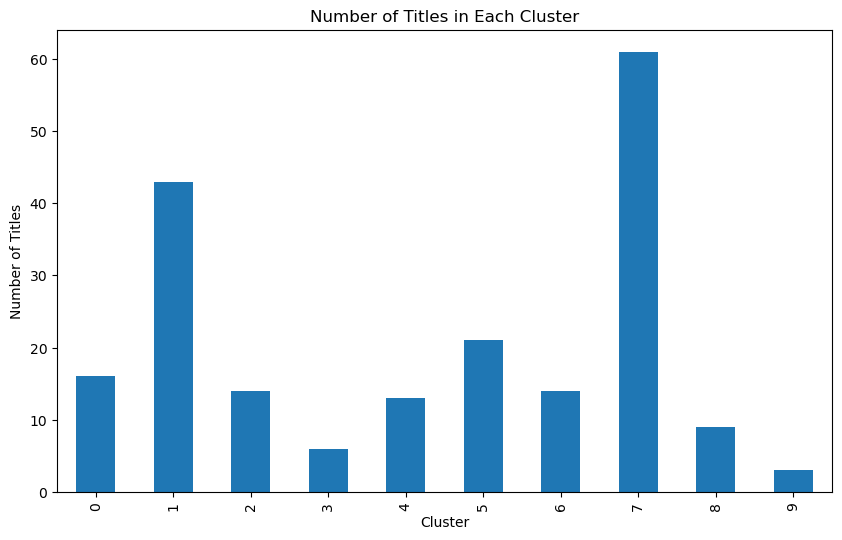

In [24]:
# Bar chart for the number of titles in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.title('Number of Titles in Each Cluster')
plt.show()

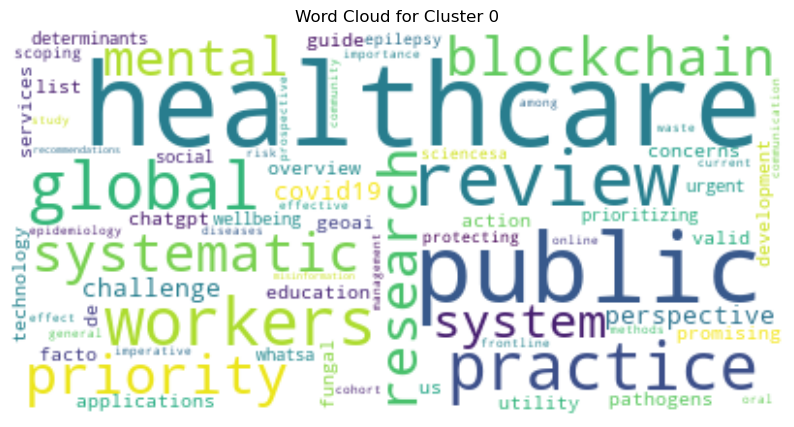

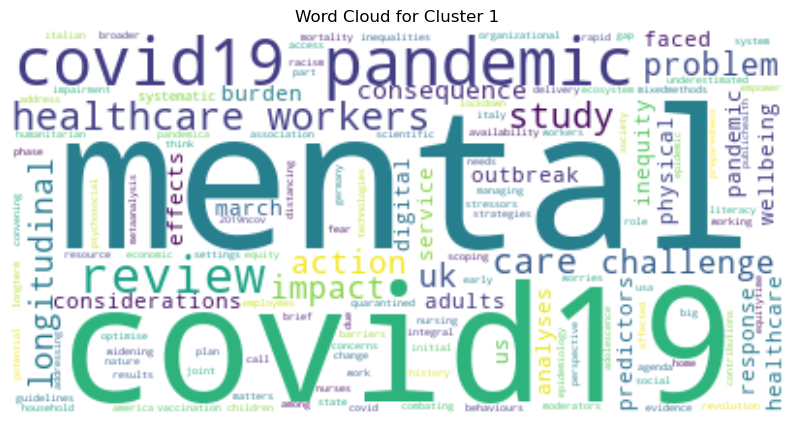

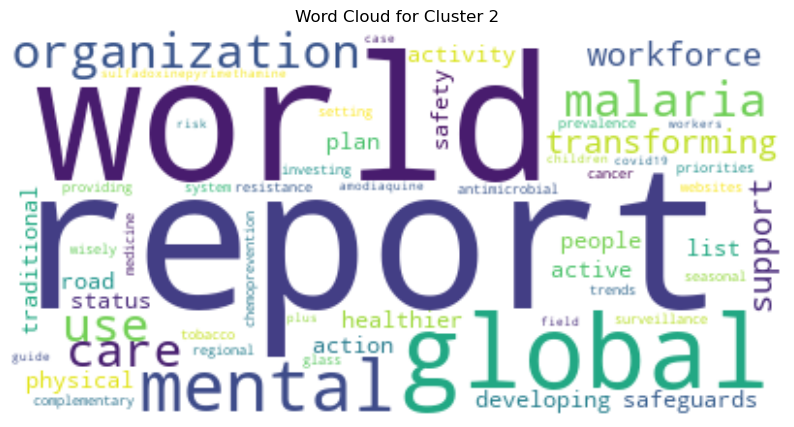

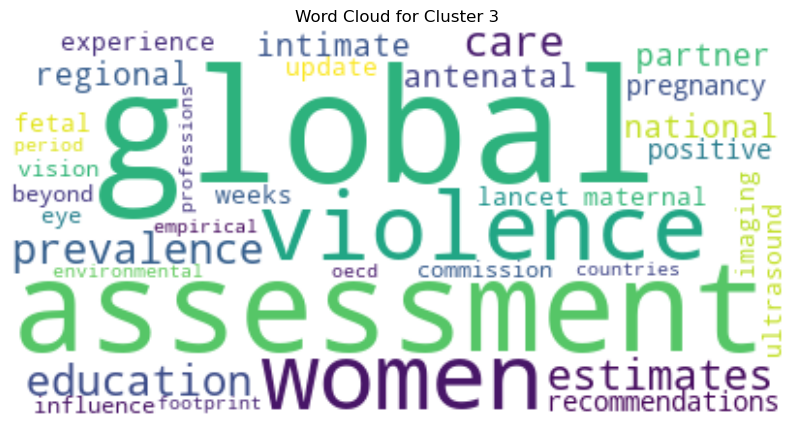

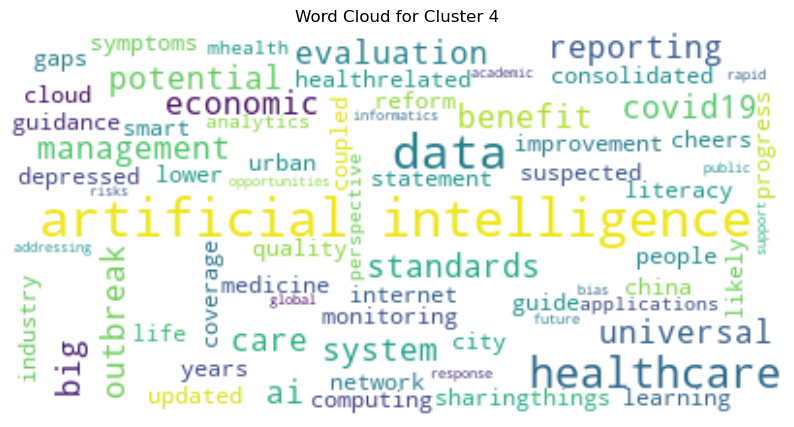

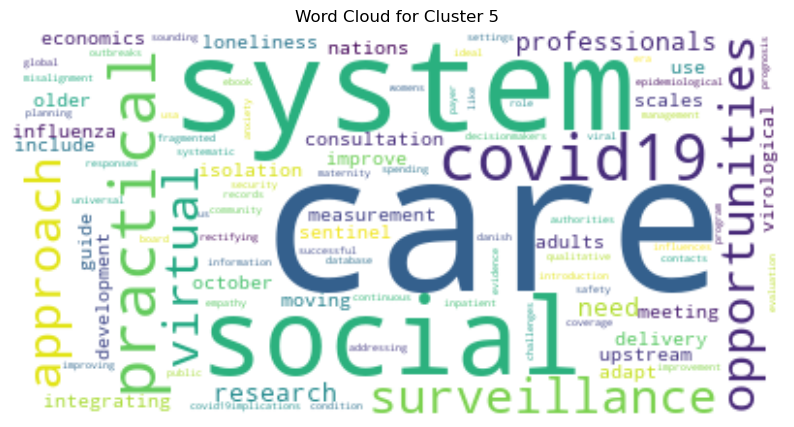

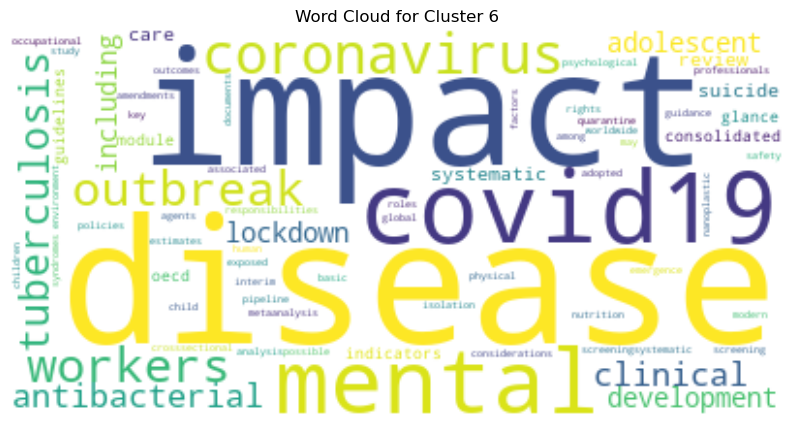

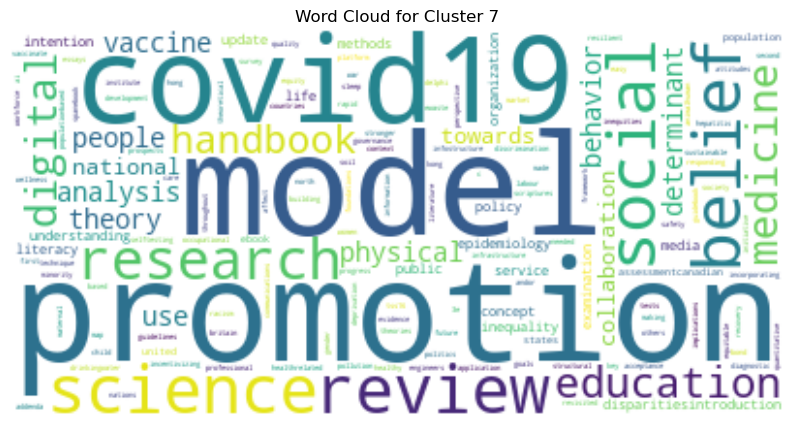

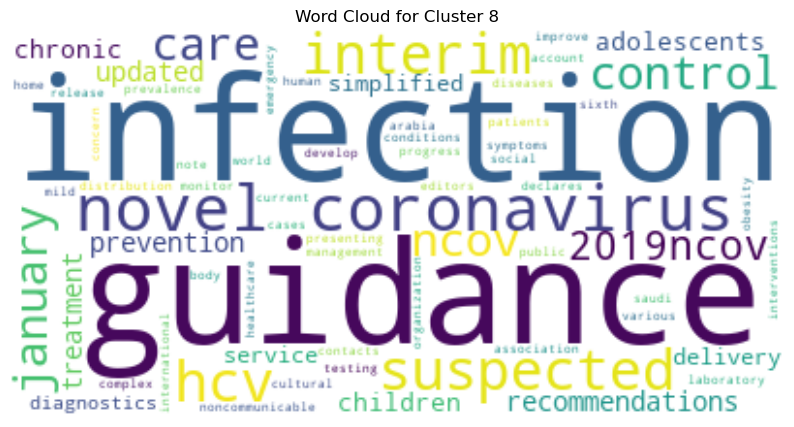

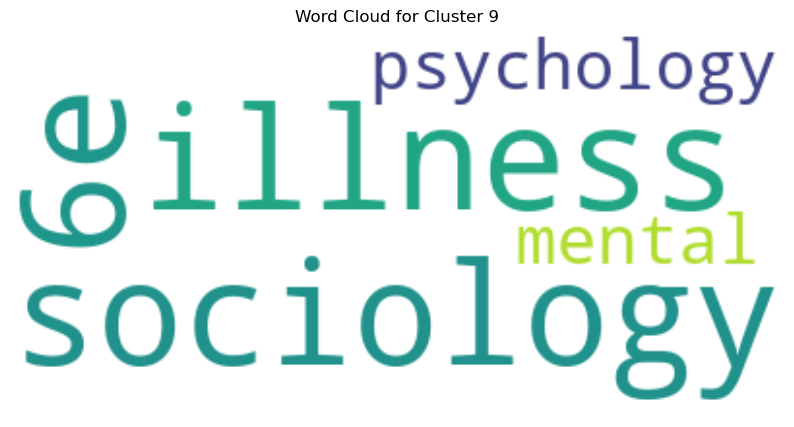

In [25]:
# Assuming df['Cluster'] already exists and documents is a list of strings
df_documents = pd.DataFrame({'Document': documents, 'Cluster': df['cluster']})

# Generate word clouds for each cluster
for cluster in range(num_clusters):
    cluster_docs = df_documents[df_documents['Cluster'] == cluster]['Document']
    cluster_words = ' '.join(cluster_docs)
    wordcloud = WordCloud(stopwords={'english', 'finance'}, background_color='white').generate(cluster_words)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

In [26]:
# Function to extract text in square brackets from the beginning of a string
def extract_brackets(text):
    if pd.isna(text):  # Handle NaN values
        return None
    match = re.match(r'^\[(.*?)\]', str(text))
    return match.group(1) if match else None

# Create new column with bracketed text
df['type'] = df['title'].apply(extract_brackets)

In [27]:
# Function to remove all square brackets and their contents from the beginning
def clean_title(text):
    if pd.isna(text):
        return None
    return re.sub(r'^\[.*?\]\s*(?:\[.*?\]\s*)*', '', str(text)).strip()

In [28]:
df['clean_title'] = df['title'].apply(clean_title)

# Count words (splitting by whitespace)
df['word_count'] = df['clean_title'].str.split().str.len()

# Count characters (excluding spaces)
df['char_count'] = df['clean_title'].str.replace(' ', '').str.len()

In [29]:
df.head()

,title,authors,description,url,citations,cluster,type,clean_title,word_count,char_count
0,[HTML][HTML] Health Care,National Academies of Sciences …,Promoting physical activity in health care set...,https://www.ncbi.nlm.nih.gov/books/NBK545645/,0,5,HTML,Health Care,2,10
1,Integrating social care into the delivery of h...,", … Delivery of Health Care to Improve the Nat...",… ultimately aim to help improve health and he...,https://books.google.com/books?hl=en&lr=&id=JM...,0,5,None,Integrating social care into the delivery of h...,16,89
2,[BOOK][B] The economics of health and health care,"S Folland, AC Goodman, M Stano, S Danagoulian",… new chapters: Disparities in Health and Heal...,https://www.taylorfrancis.com/books/mono/10.43...,0,5,BOOK,The economics of health and health care,7,33
3,An overview of GeoAI applications in health an...,"MN Kamel Boulos, G Peng, T VoPham",… Public health seeks to promote health and pr...,https://link.springer.com/article/10.1186/s129...,0,0,None,An overview of GeoAI applications in health an...,9,50
4,[BOOK][B] World mental health report: Transfor...,World Health Organization,… Mental health is a lot more than the absence...,https://books.google.com/books?hl=en&lr=&id=ln...,0,2,BOOK,World mental health report: Transforming menta...,9,54


In [30]:
# Save the updated DataFrame with cluster information to a new CSV file
df.to_csv(f'./{term}_google_scholar_results_v2.csv', index=False)

In [32]:
# df2 = pd.read_csv(f'./biology_google_scholar_results_v2.csv')

# # Add a 'category' column to each dataframe before merging
# df['category'] = 'health'
# df2['category'] = 'biology'

# # Merge the datasets
# merged_df = pd.concat([df, df2], ignore_index=True, )

# # Display the first few rows of the merged DataFrame
# merged_df.head()

,title,authors,description,url,citations,cluster,type,clean_title,word_count,char_count,category
0,[HTML][HTML] Health Care,National Academies of Sciences …,Promoting physical activity in health care set...,https://www.ncbi.nlm.nih.gov/books/NBK545645/,0,5,HTML,Health Care,2,10,health
1,Integrating social care into the delivery of h...,", … Delivery of Health Care to Improve the Nat...",… ultimately aim to help improve health and he...,https://books.google.com/books?hl=en&lr=&id=JM...,0,5,None,Integrating social care into the delivery of h...,16,89,health
2,[BOOK][B] The economics of health and health care,"S Folland, AC Goodman, M Stano, S Danagoulian",… new chapters: Disparities in Health and Heal...,https://www.taylorfrancis.com/books/mono/10.43...,0,5,BOOK,The economics of health and health care,7,33,health
3,An overview of GeoAI applications in health an...,"MN Kamel Boulos, G Peng, T VoPham",… Public health seeks to promote health and pr...,https://link.springer.com/article/10.1186/s129...,0,0,None,An overview of GeoAI applications in health an...,9,50,health
4,[BOOK][B] World mental health report: Transfor...,World Health Organization,… Mental health is a lot more than the absence...,https://books.google.com/books?hl=en&lr=&id=ln...,0,2,BOOK,World mental health report: Transforming menta...,9,54,health


In [33]:
# Save the updated DataFrame with cluster information to a new CSV file
# merged_df.to_csv(f'./dataset.csv', index=False)